# __Mini Projet Apprentissage Artificiel__ 

We start by importing all the modules we will use in this notebook.
We will use __sklearn__ as our main framework for ML.

In [1]:
import numpy as np
import pandas as pd 
import scipy.io
import sklearn
from matplotlib import pyplot as plt
from urllib.request import urlretrieve
import zipfile
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

We then load our data and vizualize it.

In [2]:
# path = "./Projet_Expression.zip"
# urlretrieve("https://moodle.psl.eu/pluginfile.php/614743/mod_resource/content/14/Projet_Expression.zip",path)
# with zipfile.ZipFile(path,'r') as zip_ref:
#     zip_ref.extractall("./Projet_Expression")

data_matrix = scipy.io.loadmat("./gliome.mat")
X = data_matrix['X']
y = data_matrix['Y'][:, 0] 

print(f"The data has the dimension : \n • Input size : {X.shape} \n • Output size : {y.shape}")

The data has the dimension : 
 • Input size : (50, 4434) 
 • Output size : (50,)


In [3]:
df = pd.DataFrame(X)
df['y'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4425,4426,4427,4428,4429,4430,4431,4432,4433,y
0,1.877947,1.301030,1.950365,2.765147,2.383456,1.935003,1.805501,1.489958,1.949878,1.984977,...,3.593485,1.686636,1.301030,1.309630,2.062958,1.332438,2.113275,2.609381,3.687966,1
1,2.651036,2.290211,2.436589,2.427530,2.818690,2.228490,2.174424,2.106459,2.091490,2.137432,...,3.498401,2.493015,1.766260,1.869179,2.238474,1.301030,1.929475,2.519645,3.951704,1
2,2.221108,2.302321,3.045137,2.438125,2.462685,1.971209,2.288998,1.436299,2.041398,2.232764,...,3.586848,2.300823,1.886583,1.806535,1.301030,1.861657,1.301030,1.301030,3.705766,1
3,2.168830,2.125105,2.993723,2.253585,2.675738,2.120541,2.464906,1.484127,1.978128,2.364278,...,3.498593,2.439544,1.881537,1.934864,1.301030,1.301030,1.301030,1.838071,3.826369,1
4,2.575785,1.705988,2.513637,2.906606,2.578367,2.200210,2.367455,1.959123,1.897500,1.956192,...,3.437832,2.224660,1.593090,1.761575,1.301030,1.602045,1.410159,1.847608,4.082294,1


In [4]:
value_counts = df['y'].value_counts()
print(value_counts)


y
4    15
1    14
3    14
2     7
Name: count, dtype: int64


This problem is a supervised classification problem. 
We will try 4 different models to classify our data into 4 differents classes (gliome types).

First we need to split our data into 2 sets : Train & Test.
As the provided dataset is very small (only 50 observations) we won't use a validation set.
In order to compare performances on different training sets, we will generate 2 couples of sets, each differentiated by its proportion of testing set (40% for the first set and 20% for the second).

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X) 

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.4,random_state=84, stratify=y)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2,random_state=7, stratify=y)

Text(0.5, 0, 'Train Labels 2')

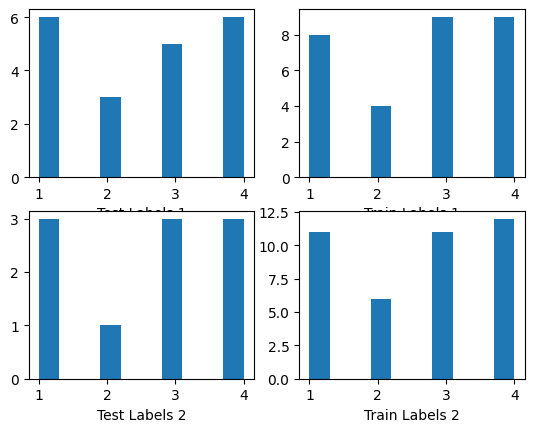

In [6]:
plt.subplot(2, 2, 1)
plt.hist(y_test_1)
plt.xlabel('Test Labels 1')
plt.subplot(2, 2, 2)
plt.hist(y_train_1)
plt.xlabel('Train Labels 1')
plt.subplot(2, 2, 3)
plt.hist(y_test_2)
plt.xlabel('Test Labels 2')
plt.subplot(2, 2, 4)
plt.hist(y_train_2)
plt.xlabel('Train Labels 2')

We can see that due to the limited number of observations in our dataset, the class 2 is lacks observations, which can harm ourprediction performances.


### Random Decision Forest Classifier (RFC)

The first method we will test is the Random Decision Forest Classifier (RFC).

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

### Dummy RFC
We start with a simple and dummy RFC with no special hyperparameters.

RESULTS ON FIRST SET TRAIN/TEST
RandomForestClassifier()
Accuracy (on test set) =  0.75
              precision    recall  f1-score   support

           1       0.71      0.83      0.77         6
           2       1.00      0.33      0.50         3
           3       0.75      0.60      0.67         5
           4       0.75      1.00      0.86         6

    accuracy                           0.75        20
   macro avg       0.80      0.69      0.70        20
weighted avg       0.78      0.75      0.73        20


 CONFUSION MATRIX


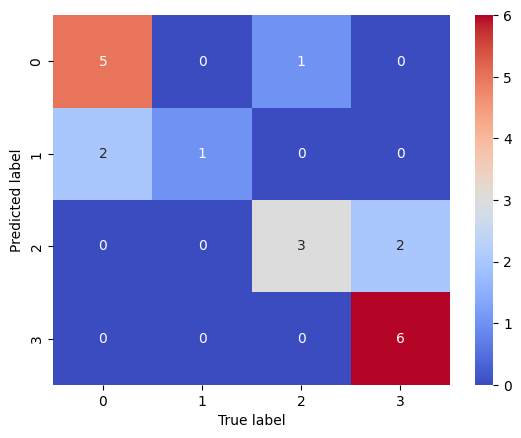

In [8]:
clf = RandomForestClassifier()
print("RESULTS ON FIRST SET TRAIN/TEST")
print(clf)
clf = clf.fit(X_train_1, y_train_1)
score = clf.score(X_test_1, y_test_1)
print("Accuracy (on test set) = ", score)
y_true, y_pred = y_test_1, clf.predict(X_test_1)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
cm = metrics.confusion_matrix(y_true=y_test_1, y_pred=y_pred)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

RESULTS ON SECOND SET TRAIN/TEST
RandomForestClassifier()
Accuracy (on test set) =  0.9
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      0.67      0.80         3
           4       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.94      0.92      0.91        10
weighted avg       0.93      0.90      0.90        10


 CONFUSION MATRIX


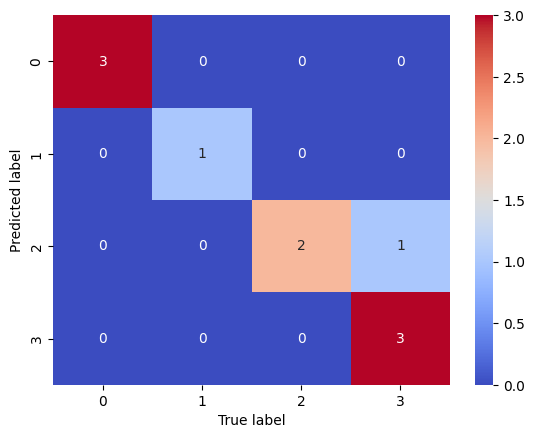

In [9]:
print("RESULTS ON SECOND SET TRAIN/TEST")
print(clf)
clf = clf.fit(X_train_2, y_train_2)
score = clf.score(X_test_2, y_test_2)
print("Accuracy (on test set) = ", score)
y_true, y_pred = y_test_2, clf.predict(X_test_2)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
cm = metrics.confusion_matrix(y_true=y_test_2, y_pred=y_pred)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

In [10]:
print(clf.get_params())
print(clf.estimators_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
[DecisionTreeClassifier(max_features='sqrt', random_state=1124306764), DecisionTreeClassifier(max_features='sqrt', random_state=627921413), DecisionTreeClassifier(max_features='sqrt', random_state=775989438), DecisionTreeClassifier(max_features='sqrt', random_state=1833384008), DecisionTreeClassifier(max_features='sqrt', random_state=187396375), DecisionTreeClassifier(max_features='sqrt', random_state=1216217076), DecisionTreeClassifier(max_features='sqrt', random_state=1255246544), DecisionTreeClassifier(max_features='sqrt', random_state=894322551), DecisionTreeClassifier(max_features='sqrt', random

We observe that we obtain an accuracy between 75% and 100% for our two splits, but with a higher one on the second one.


The RFC has the following parameters:

In [11]:
print(*[f"{k} : {v}" for k,v in clf.get_params().items()],sep = '\n')

bootstrap : True
ccp_alpha : 0.0
class_weight : None
criterion : gini
max_depth : None
max_features : sqrt
max_leaf_nodes : None
max_samples : None
min_impurity_decrease : 0.0
min_samples_leaf : 1
min_samples_split : 2
min_weight_fraction_leaf : 0.0
n_estimators : 100
n_jobs : None
oob_score : False
random_state : None
verbose : 0
warm_start : False


Let's see if we can obtain the same results by forcing these parameters and training on the first split train set.

Accuracy (on test set) =  0.9
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


 CONFUSION MATRIX


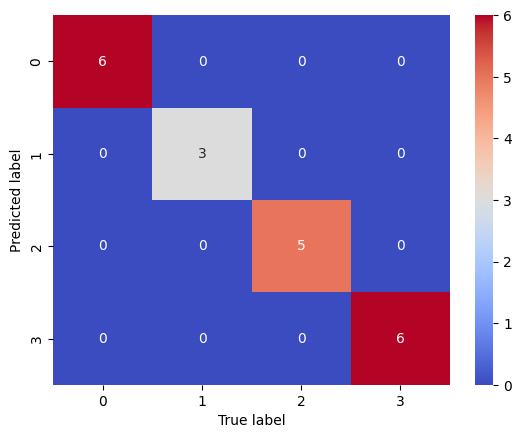

In [12]:
new_clf = RandomForestClassifier(n_estimators=100,bootstrap=True,ccp_alpha=0.0,class_weight=None,criterion='gini',max_depth=None,max_features='sqrt',max_leaf_nodes=None,max_samples=None,min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_jobs=None,oob_score=False,random_state=None,verbose=0,warm_start=False)
new_clf.fit(X_train_1,y_train_1)

print("Accuracy (on test set) = ", score)
y_true, y_pred = y_test_1, clf.predict(X_test_1)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
cm = metrics.confusion_matrix(y_true=y_test_1, y_pred=y_pred)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()


Indeed, it seems that this model is performing quite well!

Let's see if we can obtain the same results by fine-tuning the hyperparameters over neighborhood of those parameters using GridSearchCV.

### Fine-tuning of hyperparameters

In [13]:
from sklearn import model_selection

params = {
        # 'bootstrap' : [True],
        # 'ccp_alpha' : [0.0],
        # 'class_weight' : [None],
        'criterion' : ['entropy','gini'],
        'n_estimators': [100, 125, 150, 175, 200],
        'max_depth': [10, 20, 30,None],
        'min_samples_split': [2],
        'min_samples_leaf': [1, 2, 3],
        'max_features' : ['log2','sqrt',None],
        # 'n_jobs' : [None],
        # 'oob_score' : [False],
        # 'random_state' : [None],
        # 'verbose' : [0],
        # 'warm_start' : [False],
        # 'max_leaf_nodes' : [None],
        # 'max_samples' : [None]
        }

RFC = RandomForestClassifier(n_jobs=-1)
grid_cv = model_selection.GridSearchCV(RFC,param_grid= params,cv = 5,scoring='accuracy',verbose=10)
grid_cv.fit(X_train_1,y_train_1)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5; 1/360] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 1/360] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.667 total time=   0.1s
[CV 2/5; 1/360] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 1/360] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.667 total time=   0.1s
[CV 3/5; 1/360] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5; 1/360] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.667 total time=   0.1s
[CV 4/5; 1/360] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 1/360] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.667 total time=   0.1s
[CV 5/5; 1/360] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 1/360] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.833 total time=   0.1s
[CV 1/5; 2/360] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 2/360] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2],
                         'n_estimators': [100, 125, 150, 175, 200]},
             scoring='accuracy', verbose=10)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
RandomForestClassifier(max_features='log2', n_estimators=150, n_jobs=-1)
Accuracy (on test set) =  0.8
              precision    recall  f1-score   support

           1       0.71      0.83      0.77         6
           2       1.00      0.33      0.50         3
           3       0.80      0.80      0.80         5
           4       0.86      1.00      0.92         6

    accuracy                           0.80        20
   macro avg       0.84      0.74      0.75        20
weighted avg       0.82      0.80      0.78        20


 CONFUSION MATRIX


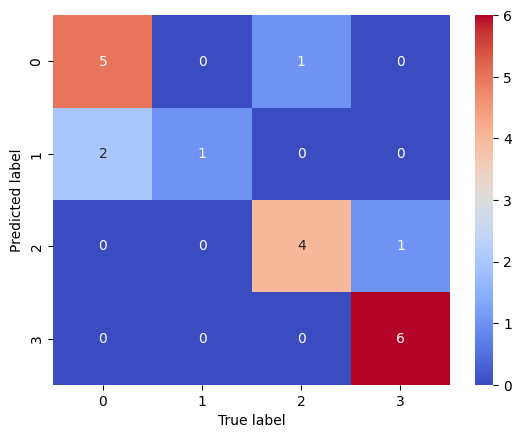

In [14]:
best_DTC = grid_cv.best_estimator_
best_params = grid_cv.best_params_
print(best_params)
best_DTC = best_DTC.fit(X_train_1, y_train_1)

# Evaluate accuracy on test data
print(best_DTC)
score = best_DTC.score(X_test_1, y_test_1)
print("Accuracy (on test set) = ", score)
y_true, y_pred = y_test_1,best_DTC.predict(X_test_1)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
cm = metrics.confusion_matrix(y_true=y_test_1, y_pred=y_pred)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

We see that even with a fine-tuning we can't get better results. It means that the model is not the most adapted to our problem. 

## __MultiLayer Perceptron Classifier (MLPC)__

We will now try a more complex model and directly use GridSearchCV amongst a random set of hyperparameters to see if it fits our problem better. 

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'max_iter': [500, 1000, 1500],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'random_state': [42]
}

# Create a neural network classifier
model = MLPClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = model_selection.GridSearchCV(model, param_grid, cv=5, scoring='accuracy',verbose=10)
grid_search.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42


[CV 1/5; 1/216] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42;, score=1.000 total time=   0.2s
[CV 2/5; 1/216] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42


/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5; 1/216] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42;, score=0.500 total time=   0.1s
[CV 3/5; 1/216] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42
[CV 3/5; 1/216] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42;, score=0.500 total time=   0.1s
[CV 4/5; 1/216] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42
[CV 4/5; 1/216] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42;, score=0.667 total time=   0.1s
[CV 5/5; 1/216] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42
[CV 5/5; 1/216] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0

/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 115/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.833 total time=   2.4s
[CV 1/5; 116/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 1/5; 116/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=0.833 total time=   0.1s
[CV 2/5; 116/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 2/5; 116/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=0.500 total time=   0.3s
[CV 3/5; 116/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 3/5; 116/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate

/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 133/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.833 total time=   2.2s
[CV 2/5; 133/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42


/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 133/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.833 total time=   2.4s
[CV 3/5; 133/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42
[CV 3/5; 133/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.667 total time=   0.2s
[CV 4/5; 133/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42


/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 133/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.667 total time=   2.3s
[CV 5/5; 133/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42


/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 133/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.833 total time=   2.3s
[CV 1/5; 134/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 1/5; 134/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=0.833 total time=   3.0s
[CV 2/5; 134/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 2/5; 134/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=0.833 total time=   3.1s
[CV 3/5; 134/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 3/5; 134/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5

/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 142/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.833 total time=   3.8s
[CV 1/5; 143/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 1/5; 143/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=1.000 total time=   0.3s
[CV 2/5; 143/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 2/5; 143/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=0.833 total time=   0.3s
[CV 3/5; 143/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 3/5; 143/216] END activation=tanh, alpha=0.0001, hidden_layer_si

/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 143/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=1.000 total time=   7.7s
[CV 1/5; 144/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1500, random_state=42
[CV 1/5; 144/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1500, random_state=42;, score=1.000 total time=   0.4s
[CV 2/5; 144/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1500, random_state=42
[CV 2/5; 144/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1500, random_state=42;, score=0.833 total time=   0.2s
[CV 3/5; 144/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1500, random_state=42
[CV 3/5; 144/216] END activation=tanh, alpha=0.0001, hidden_layer_s

/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 184/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.667 total time=   2.3s
[CV 4/5; 184/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42
[CV 4/5; 184/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.667 total time=   2.0s
[CV 5/5; 184/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42
[CV 5/5; 184/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.500 total time=   1.1s
[CV 1/5; 185/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000, random_state=42
[CV 1/5; 185/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, 

/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 193/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.667 total time=   3.8s
[CV 3/5; 193/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42
[CV 3/5; 193/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.667 total time=   0.1s
[CV 4/5; 193/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42
[CV 4/5; 193/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.667 total time=   0.2s
[CV 5/5; 193/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42


/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 193/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.833 total time=   3.7s
[CV 1/5; 194/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42
[CV 1/5; 194/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42;, score=1.000 total time=   0.1s
[CV 2/5; 194/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42
[CV 2/5; 194/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42;, score=0.667 total time=   4.3s
[CV 3/5; 194/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42
[CV 3/5; 194/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [500, 1000, 1500], 'random_state': [42]},
             scoring='accuracy', verbose=10)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.1, 'max_iter': 1000, 'random_state': 42}
MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50),
              learning_rate_init=0.1, max_iter=1000, random_state=42)
Accuracy (on test set) =  0.8
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           0.80        10
   macro avg       0.67      0.67      0.67        10
weighted avg       0.80      0.80      0.80        10

Confusion matrix for the first set of training test


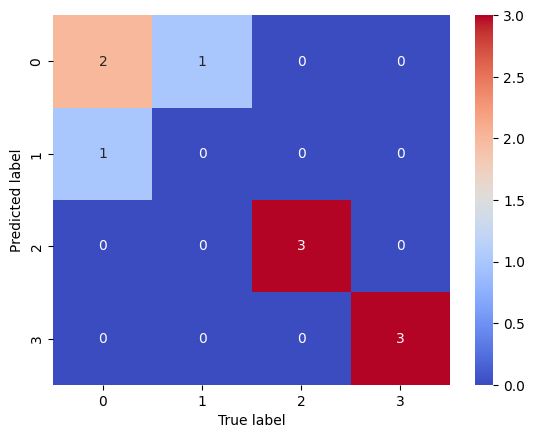

In [17]:
best_MLP = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
best_MLP = best_MLP.fit(X_train_2, y_train_2)

# Evaluate accuracy on test data
print(best_MLP)
score = best_MLP.score(X_test_2, y_test_2)
print("Accuracy (on test set) = ", score)
y_true, y_pred = y_test_2,best_MLP.predict(X_test_2)
print( classification_report(y_true, y_pred) )
print(f"Confusion matrix for the first set of training test")
cm = metrics.confusion_matrix(y_true=y_test_2, y_pred=y_pred)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

We can see that the results are still somewhat similar to those of the random forest. Next we will try two other models and compare them all.

# Regularized Logistic Regression ###

Now we will use a regularized logistic regression and GridSearchCV to see if it fits our problem.

### Optimization of the hyper-parameters for the logistic regression ###

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

stsc = StandardScaler()
X_std_train_1 = stsc.fit_transform(X_train_1)

lreg = LogisticRegression()

param_grid = [
  {'C': np.linspace(1e-3,1e-1,10),
   'penalty': ['l2']}
 ]

# Cross-validation grid-search (for finding best possible accuracy)
grid_search = GridSearchCV( lreg,
                   param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_std_train_1,y_train_1)

/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                          'penalty': ['l2']}],
             scoring='accuracy')

{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01)
Accuracy (on test set) =  0.9
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           0.90        10
   macro avg       0.69      0.75      0.71        10
weighted avg       0.82      0.90      0.86        10

Confusion matrix for the first set of training test


/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-sc

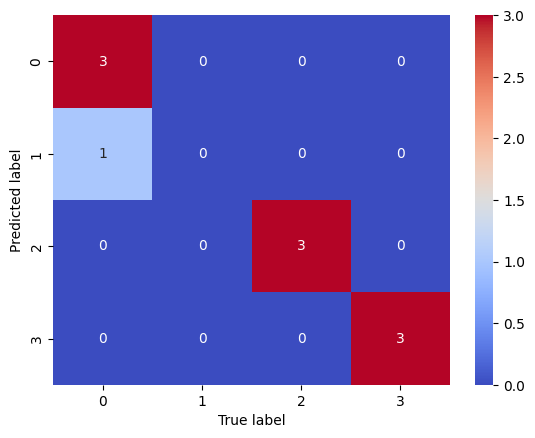

In [19]:
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
best_clf = best_clf.fit(X_train_2, y_train_2)

# Evaluate acuracy on test data
print(best_clf)
score = best_clf.score(X_test_2, y_test_2)
print("Accuracy (on test set) = ", score)
y_true, y_pred = y_test_2,best_clf.predict(X_test_2)
print( classification_report(y_true, y_pred) )
print(f"Confusion matrix for the first set of training test")
cm = metrics.confusion_matrix(y_true=y_test_2, y_pred=y_pred)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

We ca see that this classifier works well, though the second class is uncorretly predicted, but that can be explained by the fewer number of observations for this class.

# K-nearest neighbors classifier

Finally let's try the knn classifier.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

stsc = StandardScaler()
X_std_train_1 = stsc.fit_transform(X_train_1)

knn = KNeighborsClassifier()

param_grid = [
  {'n_neighbors': np.arange(1,11),
   'weights': ['uniform','distance'],
   'algorithm': ['ball_tree','kd_tree','brute'],
   'leaf_size': np.arange(1,31,10),
   'p': np.arange(1,3)}
 ]

# Cross-validation grid-search (for finding best possible accuracy)
grid_search = GridSearchCV( knn,
                   param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_std_train_1,y_train_1)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'leaf_size': array([ 1, 11, 21]),
                          'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                          'p': array([1, 2]),
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=10,
                     weights='distance')
Accuracy (on test set) =  0.9
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           0.90        10
   macro avg       0.88      0.92      0.87        10
weighted avg       0.95      0.90      0.91        10

Confusion matrix for the first set of training test


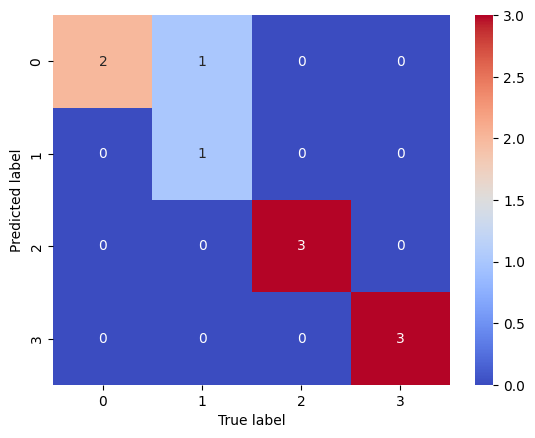

In [21]:
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
best_clf = best_clf.fit(X_train_2, y_train_2)

# Evaluate accuracy on test data
print(best_clf)
score = best_clf.score(X_test_2, y_test_2)
print("Accuracy (on test set) = ", score)
y_true, y_pred = y_test_2,best_clf.predict(X_test_2)
print( classification_report(y_true, y_pred) )
print(f"Confusion matrix for the first set of training test")
cm = metrics.confusion_matrix(y_true=y_test_2, y_pred=y_pred)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

Here the results are also quite good, and the second class has been correctly predicted. However this is unsufficient to tell which one of the knn or the logistic is the best.

# __Conclusion__

In conclusion we observed that the choice of model really matters when it comes to a classification problem. 
Here we tested 4 different classifiers : Random Forest Classifier, Multi Layer Perceptron, Logistic Regression and KNN. 

We saw that our best model is the RFC with the given parameters since it gives 100% of accuracy on the testing set no matter how we split our base dataset. 

We also saw that the KNN model can be quite well performing but it depends on how the dataset was split. 

The last two models, regularized logistic regression and knn, had comparable results with 90% of accuracy, which made them both pretty good models for this example.